In [27]:
#Loading necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from ydata_profiling import ProfileReport
import os
%matplotlib inline

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## Data Understanding

In [28]:
#Loading the dataset
cervical_data =pd.read_excel('../../Datasets/Cervical Cancer Datasets_.xlsx')
cost_data = pd.read_excel('../../Datasets/Resources Inventory Cost Sheet.xlsx')
Treatment_data = pd.read_excel('../../Datasets/Treatment Costs Sheet.xlsx')


In [29]:
#Checking the shape of the datasets
print(f"Cervical Data Shape: {cervical_data.shape}")
print(f"Cost Data Shape: {cost_data.shape}")
print(f"Treatment Data Shape: {Treatment_data.shape}")

Cervical Data Shape: (100, 13)
Cost Data Shape: (100, 6)
Treatment Data Shape: (100, 8)


### Cervical Cancer Data Analysis

In [30]:
#checking the first few rows of the dataset
cervical_data.head()

,Patient ID,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Region,Insrance Covered,Screening Type Last,Recommended Action,Unnamed: 12
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE,NaN
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION",NaN
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN


In [31]:
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient ID                 100 non-null    object
 1   Age                        100 non-null    int64 
 2   Sexual Partners            100 non-null    int64 
 3   First Sexual Activity Age  100 non-null    int64 
 4   HPV Test Result            100 non-null    object
 5   Pap Smear Result           100 non-null    object
 6   Smoking Status             100 non-null    object
 7   STDs History               100 non-null    object
 8   Region                     100 non-null    object
 9   Insrance Covered           100 non-null    object
 10  Screening Type Last        100 non-null    object
 11  Recommended Action         100 non-null    object
 12  Unnamed: 12                1 non-null      object
dtypes: int64(3), object(10)
memory usage: 10.3+ KB


In [42]:
cervical_data.columns

Index(['Patient ID', 'Age', 'Sexual Partners', 'First Sexual Activity Age',
       'HPV Test Result', 'Pap Smear Result', 'Smoking Status', 'STDs History',
       'Region', 'Insrance Covered', 'Screening Type Last',
       'Recommended Action'],
      dtype='object')

In [41]:
#Dropping unnecessary columns
cervical_data.drop(columns=['Unnamed: 12'], inplace=True)

In [ ]:
#Checking the profile of the cervical data
profile = ProfileReport(cervical_data, title="Cervical Cancer Risk Profile")
profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 842.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Analyzimg categorical variables
categorical_cols = ['HPV Test Result', 'Pap Smear Result', 'Smoking Status', 
                   'STDs History', 'Region', 'Insurance Covered', 
                   'Screening Type Last', 'Recommended Action']

print("=== CATEGORICAL VARIABLES ANALYSIS ===")
for col in categorical_cols:
    if col in cervical_data.columns:
        print(f"\n{col}:")
        print(cervical_data[col].value_counts())

=== CATEGORICAL VARIABLES ANALYSIS ===

HPV Test Result:
HPV Test Result
NEGATIVE      47
POSITIVE      46
POSITIVE\n     6
NEGAGTIVE      1
Name: count, dtype: int64

Pap Smear Result:
Pap Smear Result
N    65
Y    35
Name: count, dtype: int64

Smoking Status:
Smoking Status
N    60
Y    40
Name: count, dtype: int64

STDs History:
STDs History
N    52
Y    48
Name: count, dtype: int64

Region:
Region
Embu         14
Kericho      11
Mombasa      10
Kitale        9
Loitoktok     9
Kakamega      8
Machakos      7
Moi           5
Mombasa       5
Pumwani       4
Pumwani       3
Kitale        3
Garissa       2
Garissa       2
Kericho       2
Machakos      2
Moi           2
Kakamega      1
NAKURU        1
Name: count, dtype: int64

Screening Type Last:
Screening Type Last
PAP SMEAR    39
VIA          31
HPV DNA      30
Name: count, dtype: int64

Recommended Action:
Recommended Action
REPEAT PAP SMEAR IN 3 YEARS                                 25
FOR COLPOSCOPY BIOPSY, CYTOLOGY               

In [34]:
#Cleaning the HPV Test Result column
cervical_data['HPV Test Result'] = cervical_data['HPV Test Result'].str.strip().str.upper()
cervical_data['HPV Test Result'] = cervical_data['HPV Test Result'].replace({'NEGAGTIVE': 'NEGATIVE'})

cervical_data['HPV Test Result'].value_counts()

HPV Test Result
POSITIVE    52
NEGATIVE    48
Name: count, dtype: int64

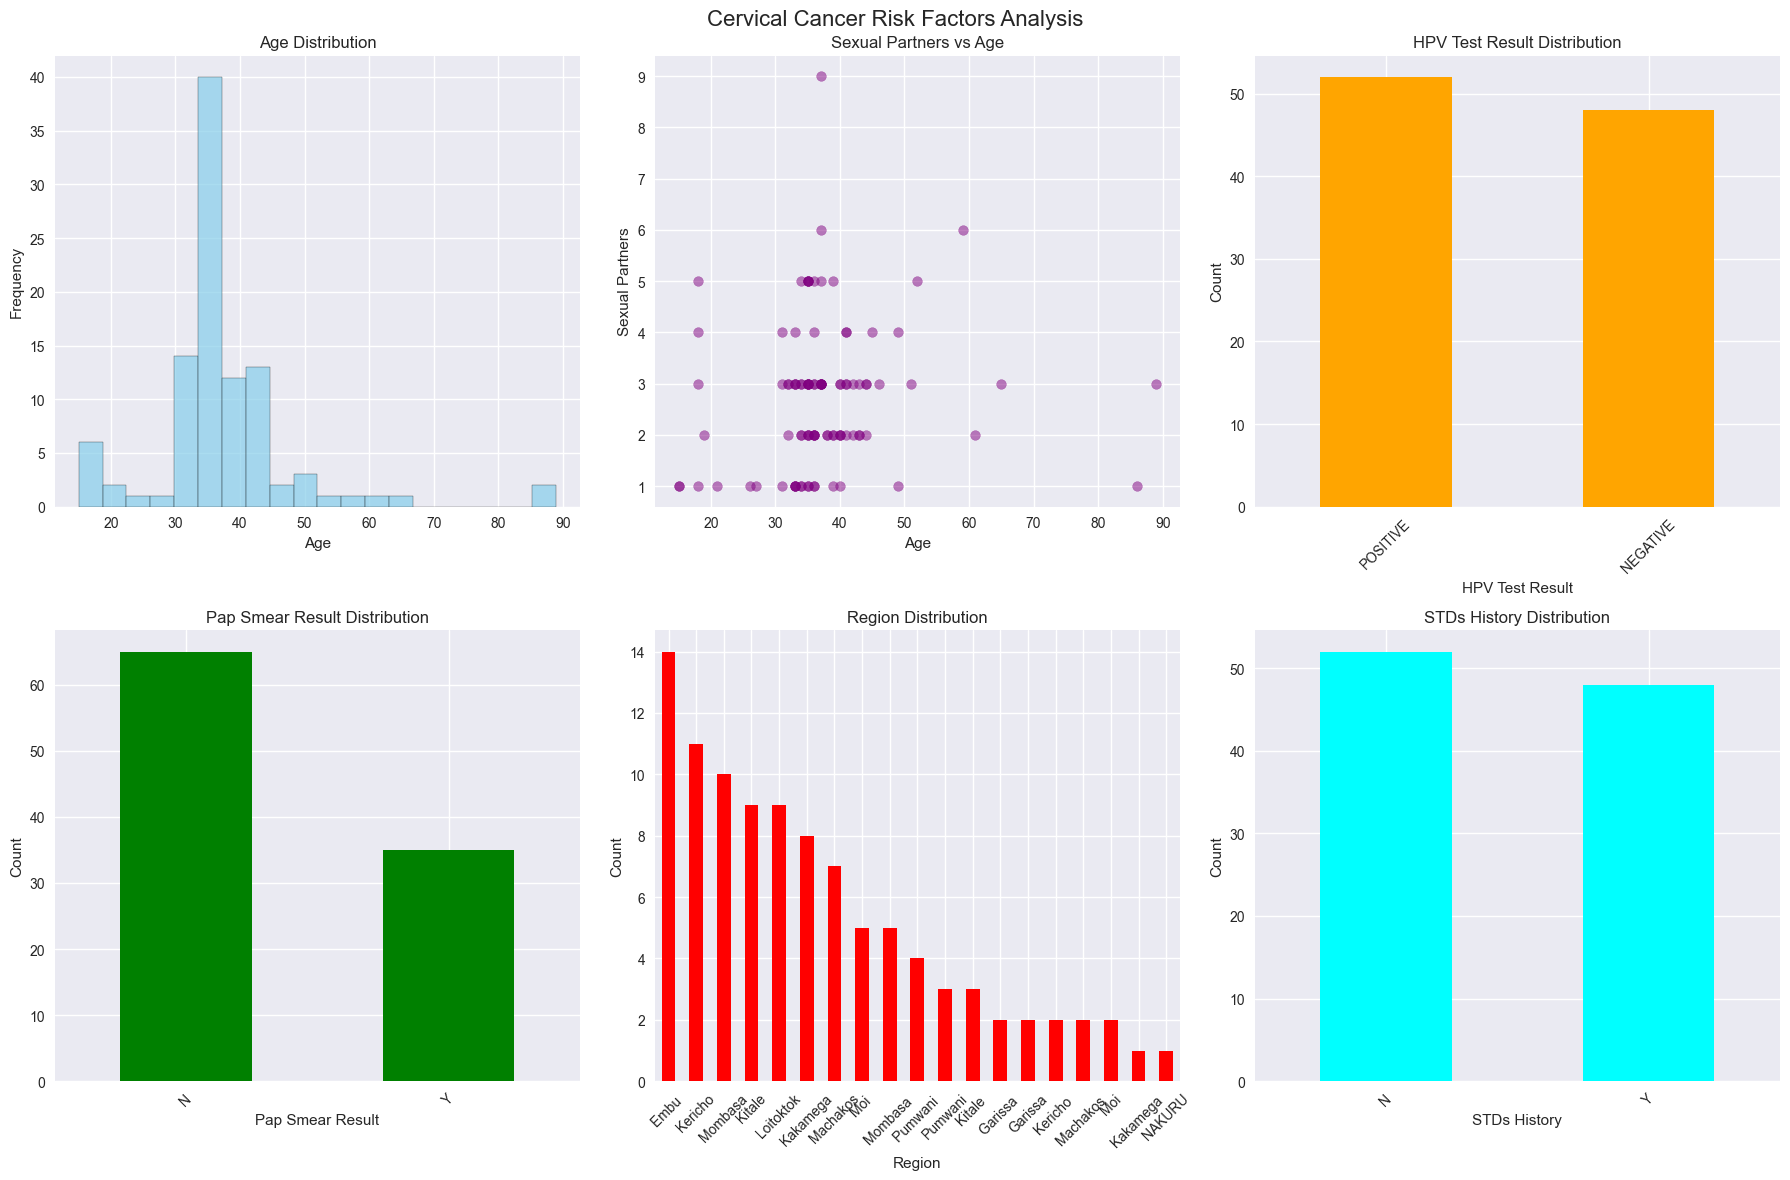

In [48]:
#Visualizing key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cervical Cancer Risk Factors Analysis', fontsize=16)

#Age Distribution
axes[0, 0].hist(cervical_data['Age'], bins=20, alpha=0.7,color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

#Sexual partners vs Age
axes[0,1].scatter(cervical_data['Age'], cervical_data['Sexual Partners'], alpha=0.5, color='purple')
axes[0,1].set_title('Sexual Partners vs Age')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Sexual Partners')

#Hpv Test Results
if 'HPV Test Result' in cervical_data.columns:
    cervical_data['HPV Test Result'].value_counts().plot(kind='bar', ax=axes[0,2], color='orange')
    axes[0,2].set_title('HPV Test Result Distribution')
    axes[0,2].set_xlabel('HPV Test Result')
    axes[0,2].set_ylabel('Count')
    axes[0,2].tick_params(axis='x', rotation=45)
#Pap Smear Results
if 'Pap Smear Result' in cervical_data.columns:
    cervical_data['Pap Smear Result'].value_counts().plot(kind='bar', ax=axes[1,0], color='green')
    axes[1,0].set_title('Pap Smear Result Distribution')
    axes[1,0].set_xlabel('Pap Smear Result')
    axes[1,0].set_ylabel('Count')
    axes[1,0].tick_params(axis='x', rotation=45)

#Region Distribution
if 'Region' in cervical_data.columns:
    cervical_data['Region'].value_counts().plot(kind='bar', ax=axes[1,1], color='red')
    axes[1,1].set_title('Region Distribution')
    axes[1,1].set_xlabel('Region')
    axes[1,1].set_ylabel('Count')
    axes[1,1].tick_params(axis='x', rotation=45)

#STDs History
if 'STDs History' in cervical_data.columns:
    cervical_data['STDs History'].value_counts().plot(kind='bar', ax=axes[1,2], color='cyan')
    axes[1,2].set_title('STDs History Distribution')
    axes[1,2].set_xlabel('STDs History')
    axes[1,2].set_ylabel('Count')
    axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observation**
- Demographics: Most cases occur in women aged 25-45, with peak frequency around age 30. Younger women report more sexual partners, increasing HPV exposure risk.
- HPV Prevalence: Nearly equal distribution of positive (52) and negative (48) HPV results indicates significant viral presence in this population.
- Screening Results: About one-third of women showed abnormal Pap smear results, while two-thirds had normal findings, highlighting the critical need for regular screening.
- Geographic Variation: Significant regional differences exist, with Embu, Kiambu, and Kirinyaga showing higher case concentrations, suggesting healthcare access disparities.
- STD History: Half the population reported previous STDs, compounding cervical cancer risk through co-infections and compromised cervical health.

Key Takeaway: This population exhibits multiple overlapping risk factors - high HPV prevalence, significant STD history, and variable screening uptake - indicating urgent need for targeted prevention programs, improved screening access, and HPV vaccination initiatives, especially in high-burden regions.

### Resource Inventory Cost Analysis

In [36]:
#checking the first few rows of the cost data
cost_data.head()

,Facility,Region,Category,Item,Cost (KES),Available Stock
0,Pumwani Maternity Hospital,Pumwani,Medications,Ibuprofen 400mg,1935.25,94
1,Kakamega County Referral Hospital,Kakamega,Medications,Combined Oral Contraceptives,4758.50,28
2,Machakos Level 5 Hospital,Machakos,Medications,Paracetamol 500mg,3686.77,86
3,Embu Level 5 Hospital,Embu,Medications,Paracetamol 500mg,3033.43,75
4,Mombasa County Hospital,Mombasa,Medications,Ibuprofen 400mg,864.49,3


In [37]:
#checking the descriptive statistics of the cost data
profile = ProfileReport(cost_data, title="Cervical Cancer Risk Profile")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 340.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

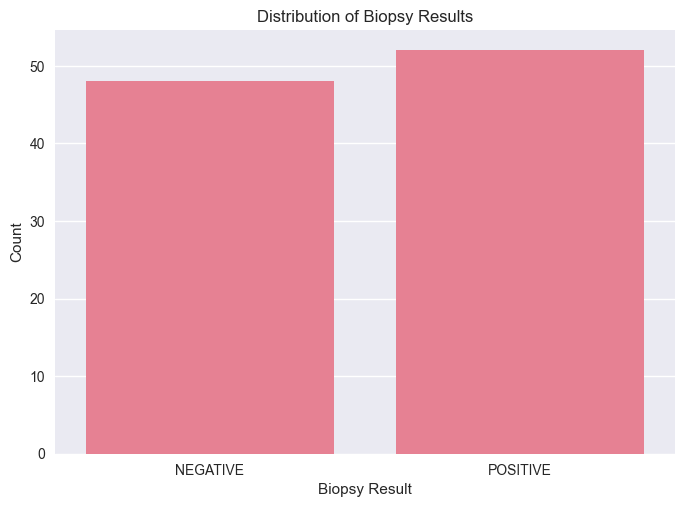

In [38]:
# EDA of the cervical data
sns.countplot(x='HPV Test Result', data=cervical_data)
plt.title('Distribution of Biopsy Results') 
plt.xlabel('Biopsy Result')
plt.ylabel('Count')
plt.show()